# Exercise 05: Regression II

Welcome to the fifth exercise for Applied Machine Learning. 

Your objectives for this session are to: 
- implement regression models with multiple attributes and polynomial terms, 
- detect overfitting with hold-out data and cross-validation, and
- tune model hyperparameters with `GridSearchCV`.

---------------------

### Part 1: Training and testing a simple multiple linear regression

We will again be looking at `HomesSoldHellerup.csv`, so the data should be familar to you if you did the exercise from last week. But unlike last week, today we'll include multiple attributes and polynomial terms to build increasingly complex regression models. 

Let's start by importing our libraries for today.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# <font color='red'>TASK 1</font>

Read in the dataset, `HomesSoldHellerup.csv`, and define it as `homes_df`(remember: the separator in this dataset is a semicolon, not a comma).

In [4]:
# your code here
homes_df = pd.read_csv('HomesSoldHellerup.csv', sep=';')

# <font color='red'>TASK 2</font>

Now define your feature matrix `X` and target `y`. Create `X` with the features `m2` and `Build Year`. `y` should be the `Price` of a home.

In [5]:
# your code here
X = homes_df[['m2', 'Build Year']]
y = homes_df['Price']

# <font color='red'>TASK 3</font>

Use the `train_test_split` function that you used in Exercise 03 on `X` and `y` to create `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)


If you've made the split correctly, the following code should return

`X_train (1620, 2) y_train (1620,) X_test (540, 2) y_test (540,)` 

In [7]:
print("X_train", X_train.shape, "y_train", 
      y_train.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

X_train (1620, 2) y_train (1620,) X_test (540, 2) y_test (540,)


# <font color='red'>TASK 4</font>

Now fit a linear regression model to `X_train` and `y_train` and define it as `lr`. Then print the model's training and test scores.

In [15]:
# your code here - fit a simple linear regression, lr
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# your code here - print scores
print("Train score:", lr.score(X_train, y_train))
print("Test score:", lr.score(X_test, y_test))

Train score: 0.3340174686234151
Test score: 0.35749074613174403


How does the score on the training data compare to the score on the test data? What does this tell us?

### Part 2: Training and testing a more complex polynomial regression model

One way we could try to improve on predictive performance of our simple multiple linear regression is to increase the complexity of the model by introducing more attributes and polynomial terms. With polynomial terms, the line we fit to the data can be curvy. Let's try it.  

# <font color='red'>TASK 5</font>

Re-define `X` and `y`. Create `X` with the features `m2`, `Type` , `City`, and `Build Year` (remember: categorical variables should be transformed into dummy variables). `y` should again be the `Price` of a home. Then make a train-test split just like you did before.

In [8]:
# your code here - re-define X and y
X = homes_df[['m2', 'Build Year', 'Type', 'City']]
y = homes_df['Price']
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummies

In [9]:
# your code here - make train-test split to get X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

Now use the code below to create polynomial features on the training data to the degree of 5. 

In [10]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

To see what happened, compare the dimensions of the feature matrix before and after creating polynomial features below.

In [11]:
print("The dimensions of the feature matrix *before* adding polynomial features are:", X_train.shape)
print("The dimensions of the feature matrix *after* adding polynomial features are:", X_train_poly.shape)

The dimensions of the feature matrix *before* adding polynomial features are: (1620, 11)
The dimensions of the feature matrix *after* adding polynomial features are: (1620, 4368)


This should show that there are the same number of rows (`1620`) both before and after creating polynomial features. But, the number of columns after creating polynomial features has increased from `11` to `4368`. That's a lot of features — or, in other words, a lot of parameters to learn from the training data.  

# <font color='red'>TASK 6</font>

Now fit a linear regression model to `X_train_poly` and `y_train`, and print the model's training and test scores. Define the model as `poly_lr`.

In [12]:
# your code here - fit a more complex polynomial regression, poly_lr
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [13]:
# your code here - print scores
print("Train score:", poly_lr.score(X_train_poly, y_train))
print("Test score:", poly_lr.score(X_test_poly, y_test))

Train score: 0.42847658924142884
Test score: -12043715453799.508


How does the score on the training data compare to the score on the test data? What does this tell us? 

______

### Part 3: k-fold cross-validation

By now you might have noticed that the training and test scores you're getting might vary compared to others' around you. This is because the results you get are dependent on the train-test split, which involves randomly sampling from the datasets (i.e., your specific computer might used different instances as training data vs testing data, as compared to others' around you).

To get a sense of how much we should expect test scores to vary we can use a more sophisticated, "robust" approach to the train-test split: k-fold cross-validation. This can be especially useful if you don't have a very large dataset to begin with and you want to make use of all your data for training, rather than putting aside some of it in a test set.

# <font color='red'>TASK 7</font>

Use the `cross_val_score` function to apply k-fold cross-validation over `X` and `y` (all your data) with the simple model you made (`lr`). Specify that there should be 10 folds and save all the test scores as an object called `simple_scores`.

*Hint: you'll probably need to check out the documentation for `cross_val_score` here:* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [17]:
# your code here - perform k-fold cross-validation to evaluate lr and save scores as simple_scores
simple_scores = cross_val_score(lr, X, y, cv=10)

Use the code below to inspect the average and standard deviation of the test scores returned by the k-fold cross-validation your just performed. 

In [18]:
print("The average test score is:", simple_scores.mean())
print("The standard deviation of the test scores is:", simple_scores.std())

The average test score is: 0.4044903076433621
The standard deviation of the test scores is: 0.22765824453343908


# <font color='red'>TASK 8</font>

Now do the same again but for the complex model (`poly_lr`). 

1. Use the `cross_val_score` function to apply k-fold cross-validation over `X` and `y` (all your data) with the complex model you made (`poly_lr`). 
2. Specify that there should be 10 folds and save all the test scores as an object called `complex_scores`.
3. Inspect the average and standard deviation of `complex_scores`.

*Hint: You'll first need to create polynomial features to degree 5 for `X`, because before we just made polynomial features separately on `X_train` and `X_test`. So, your first lines of code should be `poly = PolynomialFeatures(degree=5)` and then `X_poly = poly.fit_transform(X)`.*

In [20]:
# your code here
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
complex_scores = cross_val_score(poly_lr, X_poly, y, cv=10)
print("The average test score is:", complex_scores.mean())
print("The standard deviation of the test scores is:", complex_scores.std())

The average test score is: -478006356418049.8
The standard deviation of the test scores is: 1383624726758959.8


Compare the outputs of the k-fold cross-validation scores for the simple vs. complex model. What can we learn?

______

### Part 4: Tuning with GridSearchCV

Another way k-fold cross-validation can be useful is within the `GridSearchCV` function. Read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. The basic idea is that for any model with hyperparameters (e.g., `max_depth` for decision trees, `alpha` for Lasso and Ridge Regression), you can specify a range of possible values and see which values give you the best performance by iteratively running k-fold cross-validation within your training set, before ultimately evaluating a tuned model on your test set.

For example, we just saw how a regression model with polynomial degree of 5 overfit the data. But what if we set the polynomial degree to 1, 2, 3, or 4? With `GridSearchCV` we can easily try all these possibilities and compare performance before evaluating on a test set.

Run the code below and see if you can understand it line by line. For whatever models you choose to use in your course project, I strongly encourage you to tune your models and understand what the hyperparameters do.

In [21]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# set up the parameter grid - what values should we check for the polynomial degree?
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5]
}

# create the pipeline with PolynomialFeatures and LinearRegression
model = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('lin_reg', LinearRegression())
])

# set up GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='r2', n_jobs=-1)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Mean R-squared for {params}: {mean_score}")

# retrieve the best hyperparameters and the corresponding best estimator
best_degree = grid_search.best_params_['poly_features__degree']
best_model = grid_search.best_estimator_

# print the best hyperparameters
print(f"Best Polynomial Degree: {best_degree}")

# evaluate the best model on the test data
test_score = best_model.score(X_test, y_test)
print(f"Test R-squared with best model: {test_score}")

Mean R-squared for {'poly_features__degree': 1}: 0.32286173225497167
Mean R-squared for {'poly_features__degree': 2}: -0.007526164027157145
Mean R-squared for {'poly_features__degree': 3}: -230.4733440773207
Mean R-squared for {'poly_features__degree': 4}: -299580093880.1993
Mean R-squared for {'poly_features__degree': 5}: -3500337734450025.5
Best Polynomial Degree: 1
Test R-squared with best model: 0.35749074613174425


The results of this process tell us that when we use the attributes `m2`, `Type`, `City`, and `Build Year` to predict `Price`. The best polynomial degree is 1, meaning we should just use a standard multiple linear regression, rather than adding complexity with polynomial features.

Importantly though, this is not always going to be the case. It will depend on the data and the task at hand.

______

### Part 5: A simulated example of overfitting

To provide a nice, clean, visual demonstration of overfitting, we can use simulated data. Run the code below and inspect the plots. Don't worry too much about the code provided — this is just for illustrative purposes.

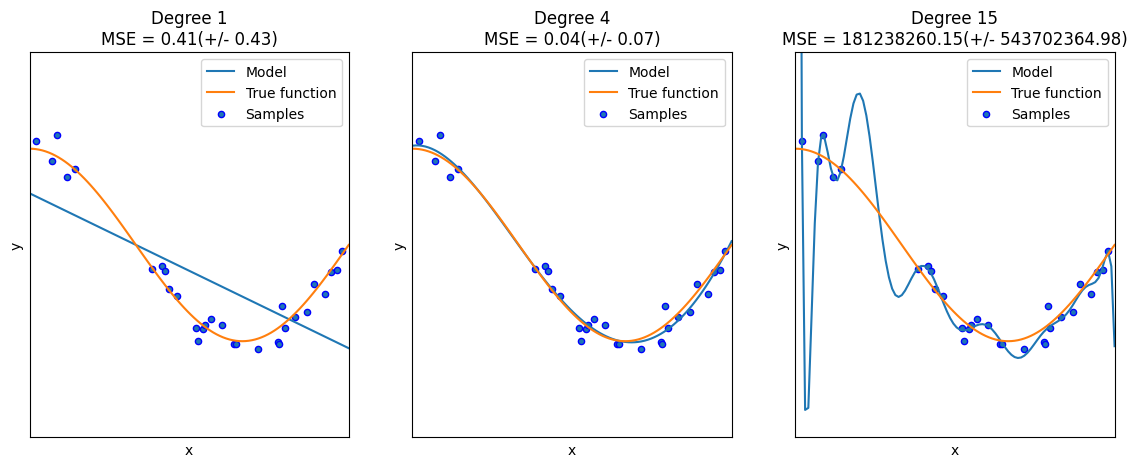

In [22]:
# defining a true function — the true relationship between x and y
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

# how many data points should we simulate?
n_samples = 30

# degrees mean the number of polynomial terms to add 
# e.g., 3 degrees means the linear regression equation is: y = b + w*x + w*x^2 + w*x^3
# here we're saying that we want a model with degree=1, a model with degree=4, and a model with degree=15
degrees = [1, 4, 15] 

# simulating some fake data for X and y
X = np.sort(np.random.rand(n_samples)) 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# fit our models and plot the outputs
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # evaluate the models using cross-validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    # plot with matplotlib library
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2f}(+/- {:.2f})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

What can you learn from the plots above? Try changing the values in `degrees` and see what happens.

*Note: here we've use mean squared error (MSE) as the loss function instead of R-squared. An arbitrary choice for this demonstration.*

---------
**That's it for this week! Next week we'll look at instance-based learning and practicing tuning hyperparameters some more.**